# Task 2
Perform Exploratory Data Analysis(EDA) on the Titanic Dataset

Dataset used: Titanic Dataset

Link: https://www.kaggle.com/c/titanic/data?select=train.csv

### Step 1: Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load Titanic Dataset

In [2]:
# Load dataset
titanic = pd.read_csv("train.csv")

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 3: Understand the data

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Step 4: Clean the data(Filling in missing values/Dropping columns)

In [6]:
# Fill missing Age with median
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Drop Cabin (too many missing values)
titanic.drop(columns=['Cabin'], inplace=True)

# Fill missing Embarked with mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

titanic.isnull().sum()

C:\Users\farha\AppData\Local\Temp\ipykernel_23620\904521120.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
C:\Users\farha\AppData\Local\Temp\ipykernel_23620\904521120.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Step 5: Perform Univariate Analysis

Survival Distribution

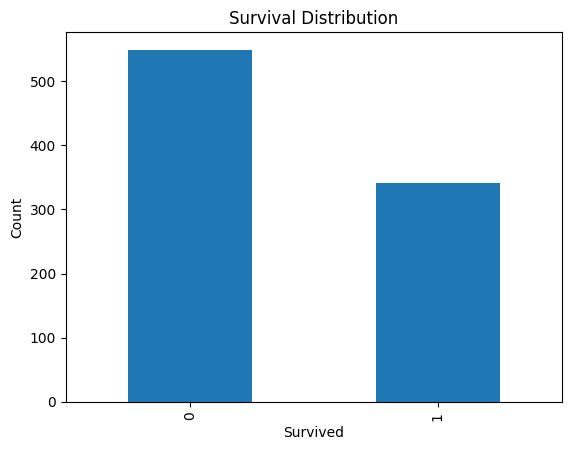

In [11]:
titanic['Survived'].value_counts().plot(kind='bar')
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

Age Distribution

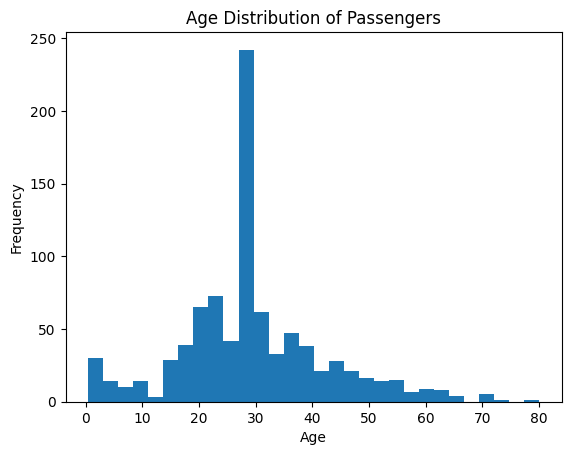

In [12]:
plt.hist(titanic['Age'], bins=30)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Step 6: Perform Bivariate Analysis

Age vs Survival

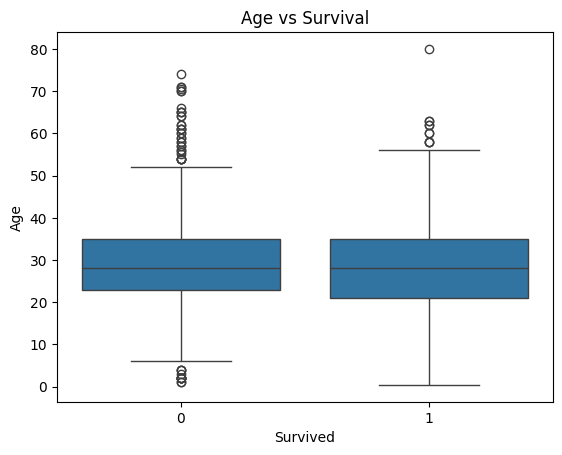

In [13]:
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Age vs Survival')
plt.show()

Fare vs Survival

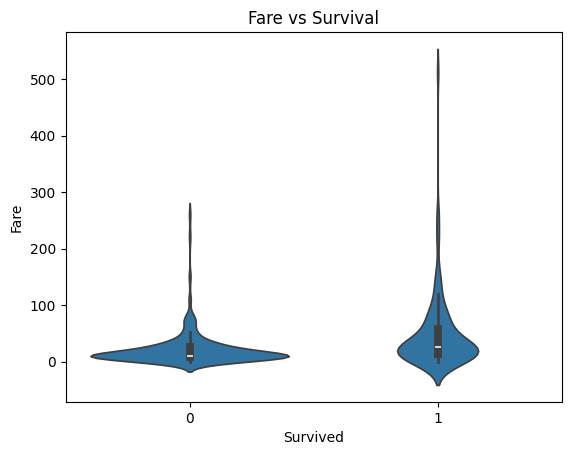

In [14]:
sns.violinplot(x='Survived', y='Fare', data=titanic)
plt.title('Fare vs Survival')
plt.show()

Survival vs Passenger Class

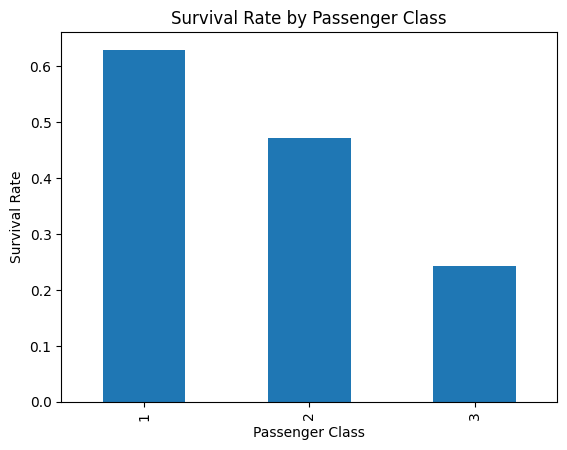

In [15]:
titanic.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

Age vs Fare

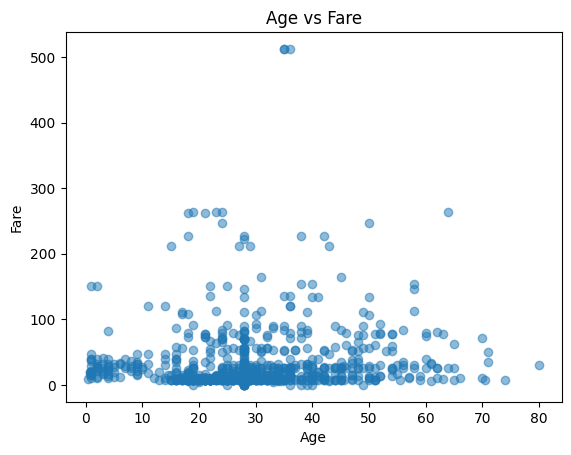

In [16]:
plt.scatter(titanic['Age'], titanic['Fare'], alpha=0.5)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

### Step 7: Correlation Heatmap

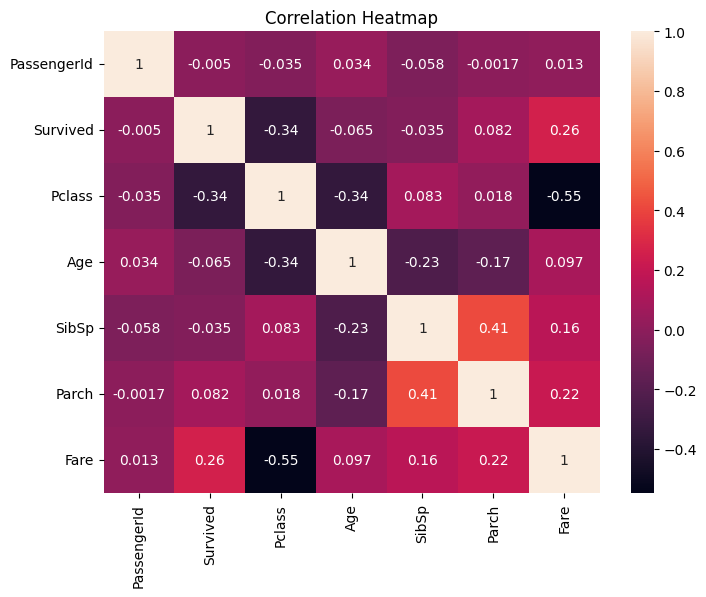

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(titanic.corr(numeric_only=True), annot=True)
plt.title('Correlation Heatmap')
plt.show()

## 🎯 Key Insights/Conclusions

Females had significantly higher survival rates than males

First-class passengers had the highest survival probability

Younger passengers were more likely to survive

Socio-economic status played a major role in survival